In [1]:
import sys
import os
sys.path.append(os.getcwd())
from src.taxodist import td_utils as utils
from src.taxodist import tree_parsers
from src.taxodist import td_calc
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pylab as plt
#plt.style.use("seaborn")

In [2]:
df_hd_moltb = pd.read_excel('analysis/resources/pseudo_icd10_hauptdiagnose_moltb.xlsx')
df_pancreas_hd = df_hd_moltb[df_hd_moltb['ICD-10 Hauptdiagnose'].str.contains('C25')]

df_moltb = pd.read_excel('analysis/resources/pseudo_icd10_moltb.xlsx')
df_patient_icd = df_moltb.groupby(df_moltb.PseudoPatNr.name)['ICD'].agg(list).reset_index(name='ICD')
df_pancreas_patient = df_patient_icd[df_patient_icd['PseudoPatNr'].isin(df_pancreas_hd['Pseudonym'])]

pancreas_patient_array = df_pancreas_patient.to_numpy()
pancreas_icd_sets = [set(icd_list) for patient, icd_list in pancreas_patient_array]


In [ ]:
tree = tree_parsers.getICD10GMTree(version='2021')
td = td_calc.Taxodist()
# use taxodist to calculate similarity of all patients
dist_matrix = td.calc_set_sim(pancreas_icd_sets,tree,'levels','nguyen_almubaid','bipartite_matching',normalize=False)

df_mds_coordinates = utils.getMDSMatrix(dist_matrix)


c:\Users\Besitzer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


<Figure size 72x14400 with 0 Axes>

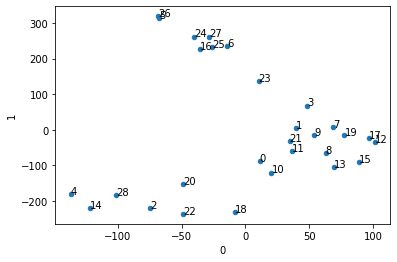

In [3]:
dist_matrix = pd.read_excel('analysis/generated/matrices/pancreas_pats_dist_L_NA_BIP.xlsx')
df_mds_coordinates = utils.getMDSMatrix(dist_matrix)
setnames = [str(patient) for patient, icd in enumerate(pancreas_patient_array)]
plt.figure(figsize=(1,200))
fig, ax = plt.subplots()
df_mds_coordinates.plot(0, 1, kind='scatter', ax=ax)

for k, v in df_mds_coordinates.iterrows():
    ax.annotate(setnames[k], v)
    
plt.show()

In [ ]:
dist_matrix

In [ ]:
tree = tree_parsers.getICD10GMTree()
depth = tree.depth()
td = td_calc.Taxodist()

set1 = {'C00.0','C02.0','C04.0','C05.0','C06.0'}
set2 = {'D00.0','C02.0','C04.0','C05.0','C06.0'}
set3 = {'D00.0','D02.0','C04.0','C05.0','C06.0'}
set4 = {'D00.0','D02.0','D04.0','C05.0','C06.0'}
set5 = {'D00.0','D02.0','D04.0','D05.0','C06.0'}

# sets = [utils.getRandomConcepts(10,tree) for x in range(0,10)]
sets = [set1,set2,set3,set4,set5]
column_names=['Hauptdiagnose','ND1','ND2','ND3','ND4',]

setnames = ['patient ' + str(x) for x in range(1,6)]

In [ ]:
dist_matrix = td.calc_set_sim(sets,tree,'levels','nguyen_almubaid','bipartite_matching')
sim_matrix = 1.0 - dist_matrix.round(3)
df_mds_coordinates = utils.getMDSMatrix(dist_matrix)

# fig = px.sunburst(
# sets,
# names='character',
# parents='parent',
# values='value',
# )
# fig.show()


utils.plotDistMatrix(df_mds_coordinates,setnames)
dist_matrix

In [ ]:
dist_matrix = td.calc_set_sim(sets,tree,'levels','nguyen_almubaid','bipartite_matching',normalize=False)
sim_matrix = 1.0 - dist_matrix.round(3)
df_mds_coordinates = utils.getMDSMatrix(dist_matrix)

# fig = px.sunburst(
# sets,
# names='character',
# parents='parent',
# values='value',
# )
# fig.show()


utils.plotDistMatrix(df_mds_coordinates,setnames)

In [ ]:
df_sets = pd.DataFrame([['C00.0','C02.0','C04.0','C05.0','C06.0'],['D00.0','C02.0','C04.0','C05.0','C06.0'],['D00.0','D02.0','C04.0','C05.0',
            'C06.0'],['D00.0','D02.0','D04.0','C05.0','C06.0'],['D00.0','D02.0','D04.0','D05.0','C06.0']],index=setnames,columns=column_names)

df_hd = df_sets.Hauptdiagnose.unique()
nd = [df_sets[c].unique() for c in df_sets.columns[1:5]]
nd_flat = flat_list = [item for sublist in nd for item in sublist]

#ct = pd.crosstab(index=df_sets.Hauptdiagnose,columns=df_sets.columns,ag)
#ct